# Exercises and Homework for week 3

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2022)
Nina Stiesdal & Thomas Erben

Homework is due on **Wednesday, 04/05/2022, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers and with your tutor.
 * Your code(s) need(s) to be well and appropriately commented!
 * Submit this notebook and, if necessary, additional files in a `tar`-archive with name `Homework_3_group_XX.tgz` (replace `XX` with your group number) to your tutor.

**Topics of this exercise:**
 * First contact with `numpy`-arrays
 * Basic plots with matplotlib

**Your group number here please:**  Group 2-1

# 1. Lecture Review (0 points)

If you did the lecture review questions [03_Lecture_Review.ipynb](03_Lecture_Review.ipynb) (strongly recommended!): 
Please discuss with your tutor and your group any issues/problems you had with them.

# 2. Numerical Integration (15 points)

We want to numerically estimate the integrals
$$
\int_0^{\pi}\sin(x)\,{\rm d}x = 2 \text{   and   } \int_{-1}^2 x^3\,{\rm d}x=\frac{15}{4}.
$$

We will do the estimation in the easiest possible way with Riemann sums: Be $f(x)$ a continuous function on the interval $I=[a;b]$. Be $x_i$ with $a < x_0 < \dots < x_n < b$ a partition of the interval $I$. With $\Delta x_i=x_{i+1}-x_i; i\in[0,n-1]$ and $f_{\Delta_i}=f\left(\frac{x_i+x_{i+1}}2\right)$, the integral can be approximated with
$\int_a^bf(x)\,{\rm d}x\approx \sum_{i=0}^{n-1}\Delta x_i\cdot f_{\Delta_i}=I_{\rm approx}(n).$ See the following figure for a visualisation of the method. You can read more on Riemann sums on [Wikipedia](https://en.wikipedia.org/wiki/Riemann_sum). 

<img src="figs/sin_cubic.png" style="width: 500px;" style="height: 250px;">



1. Implement the Riemann integration; Given numpy arrays with $x_i$ and corresponding function values, the calculations of $\Delta x_i$, $f_{\Delta_i}$ and the Riemann sum can be done with a single numpy-expression each.
2. Obviously, the accuracy of our numerical estimates depend on the partition of the interval $I=[a;b]$ and particularly on our choice of $n$. One can show that the absolute error $\epsilon_{\rm abs}(n)$ of the integral approximation with Riemann sums behaves like:
$$
\epsilon_{\rm abs}(n)=\left|I_{\rm approx}(n)-\int_a^bf(x)\,{\rm d}x\right| \propto n^{\alpha}.
$$
Perform some experiments to estimate $\alpha$. **Remark:** The task is deliberately vaguely formulated. To come up with a reasonable test is part of the exercise.

3. Modify your program from subtask 1 to estimate the indefinite integral
$F(x)=\int_0^x \sin(y)\,{\rm d}y$
in the interval $x\in[0;2\pi]$ and plot $F(x)$. Is the result what
you are expecting?
  **Hint for subtask (3):** Have a look at the function `numpy.cumsum`.

In [30]:
# Your solution for subtask (1) here please
%matplotlib inline
import numpy as np

n=50
print(f'Using n={n} points for approximation')
#approximate integral of sin from 0 to pi
x1 = np.linspace(0, np.pi, n)
f1 = np.sin(x1)
#for steps in between, stop at the second to last index, since the last one has to successor
delta_x1 = x1[1:] - x1[:-1]
f_delta_1 = np.sin(x1[:-1]+delta_x1/2)
#calcualte approximation for inetgral and output result
I1 = np.sum(delta_x1 * f_delta_1)
print(f'The approximation for I1 is {I1} and the absolute error is {abs(2-I1)}')

#approximate integral of x**3 from -1 to 2
x2 = np.linspace(-1, 2, n)
f2 = np.power(x2, 3)
#for steps in between, stop at the second to last index, since the last one has to successor
delta_x2 = x2[1:]-x2[:-1]
f_delta_2 = np.power(x2[:-1]+delta_x2/2, 3)
#calcualte approximation for inetgral and output result
I2 = np.sum(delta_x2 * f_delta_2)
print(f'The approximation for I2 is {I2} and the absolute error is {abs(15/4-I2)}')



Using n=50 points for approximation
The approximation for I1 is 2.0003425929413896 and the absolute error is 0.00034259294138960783
The approximation for I2 is 3.748594335693461 and the absolute error is 0.0014056643065392116


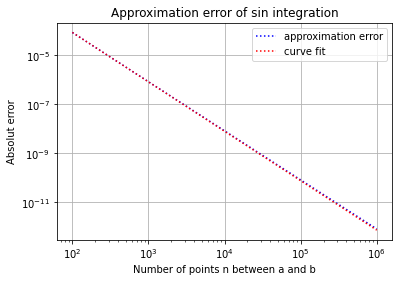

From these results we can estimate alpha to be approximatly -2.01


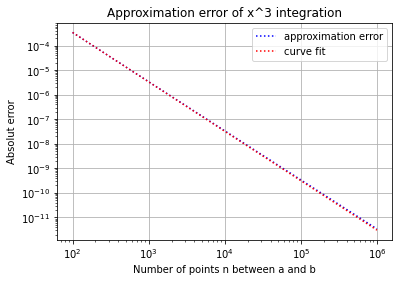

From these results we can estimate alpha to be approximatly -2.01


In [31]:
# Your solution for subtask (2) here please
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

'''
    This method calcualtes the error of of numerical integration of a given function over a given interval
    The result is then compared to the real result and the absolute difference is returned.
    
    @param func: A function that is to be integrated
    @param int n: Number of points in [a,b] used for numerical integration
    @param float a: Start of the interval [a,b]
    @param float b: End of the interval [a,b]
    @param float result: Exact result of the integral
    @param params: Possible parameters for function call, default is None for no extra parameters
    
    return float: Absolute error of numerical integration
'''
def calculate_integral_error(func, n:int, a:float, b:float, result:float, params=None)->float:
    x = np.linspace(a, b, n)
    delta_x = x[1:] - x[:-1]
    if params != None:
        f_delta = func( (x[:-1] + x[1:])/2, *params)
    else:
        f_delta = func( (x[:-1]+x[1:])/2 )
    I = np.sum(delta_x*f_delta)
    return abs(result-I)

'''
    This methods calculates A*n^alpha and is used for fitting purposes
'''
def func(n, a, alpha):
    return a*np.power(n, alpha)

#calculate integration error for different n
n = np.logspace(2, 6, dtype=int)
error1 =np.array([calculate_integral_error(np.sin, x, 0, np.pi, 2) for x in n])
error2 = np.array([calculate_integral_error(np.power, x, -1, 2, 15/4, [3]) for x in n])

#fit a function ~n^alpha to these results
params1, errors1 = curve_fit(func, n, error1)
params2, errors2 = curve_fit(func, n, error2)

#plot result and fit function for first integral
plt.plot(n, error1, 'b:', label='approximation error')
plt.plot(n, func(n, *params1), 'r:', label='curve fit')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()
plt.title('Approximation error of sin integration')
plt.xlabel('Number of points n between a and b')
plt.ylabel('Absolut error')
plt.show()

print(f'From these results we can estimate alpha to be approximatly {params1[1]:.2f}')

#plot result and fit function for second integral
plt.plot(n, error2, 'b:', label='approximation error')
plt.plot(n, func(n, *params2), 'r:', label='curve fit')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()
plt.title('Approximation error of x^3 integration')
plt.xlabel('Number of points n between a and b')
plt.ylabel('Absolut error')
plt.show()

print(f'From these results we can estimate alpha to be approximatly {params2[1]:.2f}')


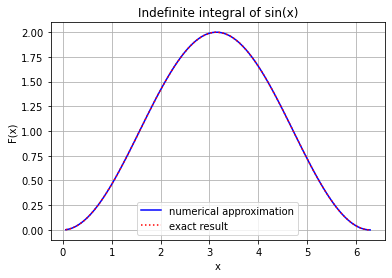

In [32]:
# Your solution for subtask (3) here please
import numpy as np
import matplotlib.pyplot as plt

n=100
x = np.linspace(0, 2*np.pi, n)
#for steps in between, stop at the second to last index, since the last one has no successor
delta_x = x[1:] - x[:-1]
f_delta = np.sin(x[:-1]+delta_x/2)
#calcualte approximation for indefinite inetgral and output result
F = np.cumsum(delta_x * f_delta)

#plot results and compare numerical and analytical results
plt.plot(x[1:], F, 'b', label='numerical approximation')
plt.plot(x[1:], -np.cos(x[1:])+np.cos(0), 'r:', label='exact result')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid()
plt.legend()
plt.title('Indefinite integral of sin(x)')
plt.show()

The results line up with our expectations, since the analytical result is given by
\begin{equation}
F(x) = \int_{0}^{x} \sin(y)\text{d}y = -\cos{x} + \cos{0} = 1-\cos{x}
\end{equation}
This shows that the cumulative sum of $\sum_{i=0}^{x_i=x}f_{\Delta x_i}\cdot \Delta x_i \approx F(x)$.

## 3. Barplots (10 points)
Reproduce the Riemann Sums plots of Task 2 with `numpy` and `matplotlib`.

**Hints:** (1) Please have a  look at the function `matplotlib.pyplot.bar`; (2) You *do not* need to reproduce the exact colors, linewidths or label sizes of the plots.

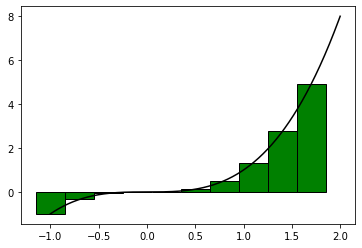

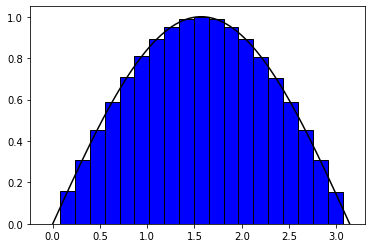

In [5]:
# Your solution here please

import numpy as np
import matplotlib.pyplot as plt

def riemannSum(func, interval, color, nBars):
    x = np.linspace(interval[0],interval[1], 1000)
    step = int(np.ceil(1000/nBars))
    xBar = x[::step] 
    plt.bar(xBar,func(xBar),(xBar[1]-xBar[0]), color = color, edgecolor = "k")
    plt.plot(x,func(x), color = "k")
    plt.show()

def xQubed(x):
    return np.power(x,3)

riemannSum(xQubed, [-1,2], "g", 10)
riemannSum(np.sin, [0,np.pi], "b", 20)

## 4. Strings (0 points)
Besides `numpy`-arrays, the second important Python-container to learn are strings. You probably already used them in your programs to print status messages or results. Strings are *homogeneous* containers of characters. I do not want to explicitly treat strings in lecture and I therefore ask you to watch the [video lecture on strings](https://youtu.be/OsQ28kHjLj0 ) and to do [string review questions](../video_lecture_01_strings/02_Strings_Review.ipynb) as part of this weeks homework tasks. The lecture notebook for strings is [here](../video_lecture_01_strings/01_Strings.ipynb).  

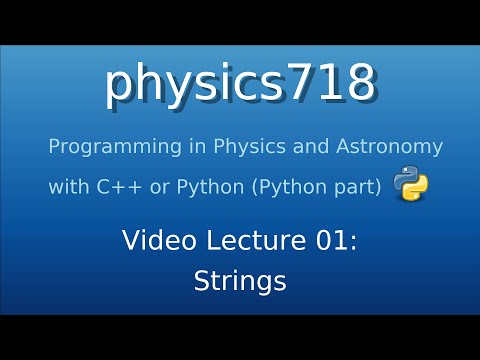

In [34]:
from IPython.display import YouTubeVideo
YouTubeVideo('OsQ28kHjLj0')